<a href="https://colab.research.google.com/github/Enthu-muskan/Task-9-Random-Forest-Credit-Card-Fraud-Detection/blob/main/Task_9_Random_Forest_%E2%80%93_Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib

In [ ]:
X, y = make_classification(
    n_samples=20000,
    n_features=30,
    n_informative=10,
    n_redundant=5,
    n_classes=2,
    weights=[0.99, 0.01],  # imbalanced like fraud
    random_state=42
)

df = pd.DataFrame(X, columns=[f"V{i}" for i in range(1,31)])
df["Class"] = y

df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,V29,V30,Class
0,-0.783815,-2.639514,1.934122,-1.942380,-0.298974,-0.856496,-0.302659,-0.227334,2.799830,-1.169746,...,-0.175260,2.453838,0.043453,2.436271,10.781364,-0.075051,-0.930565,5.254764,-0.937845,0
1,1.449197,-0.815419,0.409842,1.369442,-0.089814,1.506229,0.497768,1.572790,-0.476690,0.415344,...,-2.408548,-0.606856,0.232136,-2.828449,-0.305114,-0.140979,-0.658959,-2.492982,-0.168099,0
2,-1.483697,0.195485,-0.002712,0.574420,1.868310,0.299203,1.351874,3.534751,1.353694,0.402202,...,-0.397630,-0.552550,0.859198,1.863525,4.353439,0.096039,0.309726,1.016631,-0.275844,0
3,0.033816,-1.806432,1.358196,-0.829254,-0.134905,-0.092121,0.989866,4.012656,0.768092,-0.878829,...,-0.161165,-0.199586,-0.071833,2.839580,11.369696,0.402205,0.827751,-1.872161,2.173362,0
4,-3.863928,-3.353170,0.745818,4.162044,-0.025178,0.235544,1.897945,2.765617,2.886000,0.147676,...,-2.487252,0.168527,-0.394379,3.394361,10.353848,0.915847,-0.112608,5.507334,0.225230,0


Class
0    19693
1      307
Name: count, dtype: int64


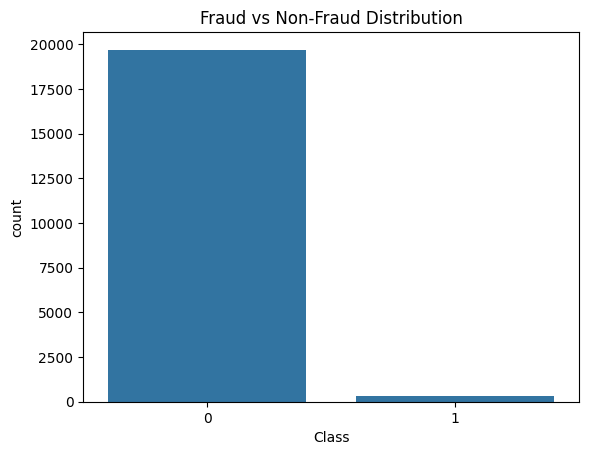

In [ ]:
print(df["Class"].value_counts())

sns.countplot(x="Class", data=df)
plt.title("Fraud vs Non-Fraud Distribution")
plt.show()

In [ ]:
X = df.drop("Class", axis=1)
y = df["Class"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

In [ ]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3939
           1       1.00      0.11      0.21        61

    accuracy                           0.99      4000
   macro avg       0.99      0.56      0.60      4000
weighted avg       0.99      0.99      0.98      4000



In [ ]:
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight="balanced"
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3939
           1       1.00      0.07      0.12        61

    accuracy                           0.99      4000
   macro avg       0.99      0.53      0.56      4000
weighted avg       0.99      0.99      0.98      4000



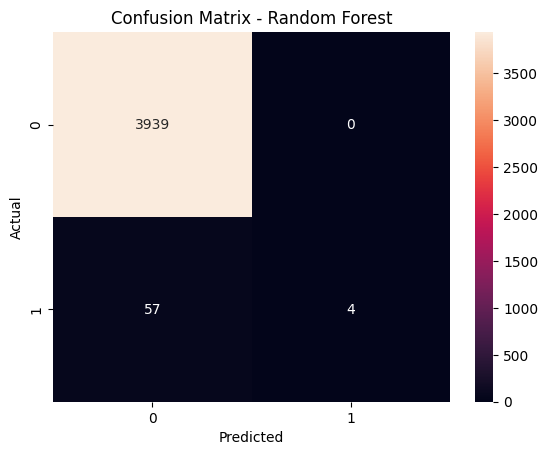

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

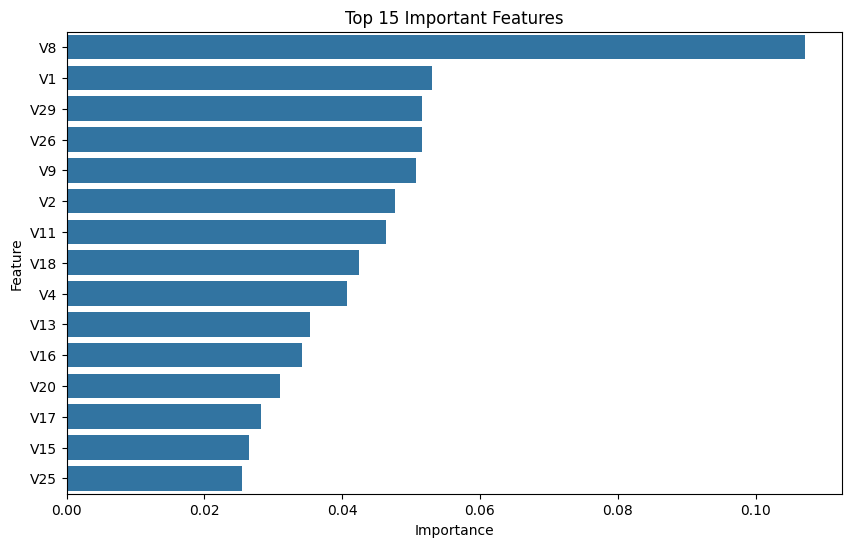

In [ ]:
importances = rf.feature_importances_

feat_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feat_df.head(15))
plt.title("Top 15 Important Features")
plt.show()